# Homework 3: Problems
## Due Friday 14 October, by 5pm

### PHYS 440/540, Fall 2022
https://github.com/gtrichards/PHYS_440_540/


## Problem 1
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.


## Problem 2

We're going to do some polynomial fits to data just like in the lecture. However, in all cases you should keep the y-intercept fixed at.

1) Read in data/hw3data.npy.  Set x, y, sigma_y = data.

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the intercept is fixed. I advise a grid size of 100.

3) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the intercept is fixed. I advise a grid size of 100 in each model dimension.

4) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture?


## Problem 3

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  

* Do you get (essentially) the same answer for day $N$ as day $N+1$?
* Does it matter whether is was clear or cloudy on the day that you started? 
* What length "burn in" would you recommend for this process?

See starter code below.  You don't **have** to use it (e.g., if you have a different way to approach/code the problem), but it should help you get started.


## Problem 4

Copy over all the code cells from our interactive MCMC example in Inference2 (7 cells in all from the cell that imports numpy to the histogram of the chain).  

Change the code so that the likelihood plot is drawn in purple instead of green or red when the odds ratio for the next model is not favored, but is still larger than the random value used for the "accept" threshold.  So, now you will have green plots for steps that are both better and accepted, purple for steps that aren't better but are still accepted, and red for steps that are not accepted.  Also change the code so that the step size is small enough that you are likely to take a long time to reach the most likely value.

Once you have done both of those things, then:

* Run enough steps to show 2 steps that were accepted, even though they are worse.
* Plot the chain showing it taking some time to get from the initial value to oscillating around the most likely value.
* Plot a histogram of the chain both using the full chain and after throwing away the "burn" period.

---

### Problem 2 Starter Code

I haven't written the solution yet, but will post some starter code once I have.

In [54]:
%matplotlib inline
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.load("../data/hw3data.npy")
x, y, sigma_y = data

In [55]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

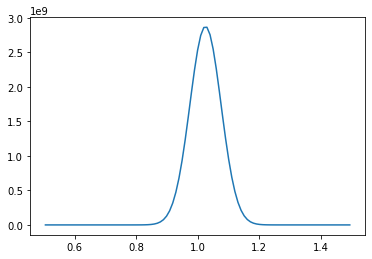

In [56]:
prior = 1/(1.5-0.5) #Uniform prior between 0.5 and 1.5

#Grid for slopes of linear fit
xgrid = np.linspace(0.5, 1.5, 100)

#Use the midpoint of the bins instead of the bin edges
xgrid_mid = 0.5*(xgrid[1:] + xgrid[:-1])

#y-intecept is fixed
theta_0 = [-0.23]

#Compute the log likelihood for each value of the slope and (fixed) intercept
logLarray = np.array([logL(np.append(theta_0,theta_1), data, model=polynomial_fit) for theta_1 in xgrid_mid])

#We were asked about the posterior (remember log rules for multiplication)
postarray = np.log10(prior) + logLarray

#Plot the posterior (unlog to see actual values)
plt.plot(xgrid_mid, np.exp(postarray))

In [57]:
prior1 = 1/(1.5-0.5) #Uniform prior between 0.5 and 1.5
prior2 = 1/(1-0.25) #Uniform prior between -1 and 0.25

#Grid for coefficient of linear term
xgrid1 = np.linspace(0.5,1.5,100)
xgrid1_mid = 0.5*(xgrid1[1:] + xgrid1[:-1])

#Grid for coefficient of quadratic term
xgrid2 = np.linspace(-1,0.25,100)
xgrid2_mid = 0.5*(xgrid2[1:] + xgrid2[:-1])

postarray2D = np.zeros((xgrid1_mid.shape[0],xgrid2_mid.shape[0]))

In [58]:
for i,theta_1 in enumerate(xgrid1_mid):
    for j,theta_2 in enumerate(xgrid2_mid):
        theta = [theta_0, theta_1, theta_2]
        
        logLarray= logL(np.array(theta), data, model=polynomial_fit)
        
        postarray2D[i,j] = np.log10(prior1) + np.log10(prior2) + logLarray
                             
postarray2D = np.exp(postarray2D)

<ipython-input-58-79ce5fa662c7>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  logLarray= logL(np.array(theta), data, model=polynomial_fit)


Text(0, 0.5, 'linear term')

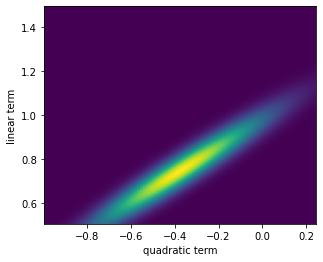

In [59]:
plt.imshow(postarray2D, extent =[xgrid2_mid.min(), xgrid2_mid.max(),
                               xgrid1_mid.min(), xgrid1_mid.max()]);
plt.xlabel('quadratic term')
plt.ylabel('linear term')

In [60]:
z1 = np.sum(np.exp(postarray2D))*np.diff(xgrid)[0]
z2 = np.sum(np.exp(postarray2D))*np.diff(xgrid1)[0]*np.diff(xgrid2)[0]

#Odds ratio is?

<ipython-input-60-852595a6727d>:1: RuntimeWarning: overflow encountered in exp
  z1 = np.sum(np.exp(postarray2D))*np.diff(xgrid)[0]
<ipython-input-60-852595a6727d>:2: RuntimeWarning: overflow encountered in exp
  z2 = np.sum(np.exp(postarray2D))*np.diff(xgrid1)[0]*np.diff(xgrid2)[0]


---

### Problem 3 Starter Code

0.845
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

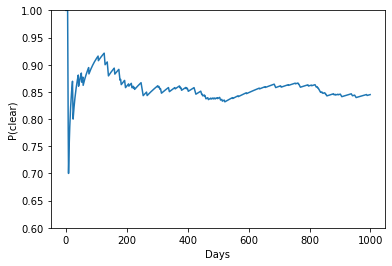

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N=1000 # Number of days to run the simulation
today = 1 # Set weather on the first day: clear=1 cloudy=0

tomorrow = 0 # Initialize tomorrow to some null value
cleardays = 0 # Keep track of the total number of clear days

chain = []
chain = np.array([])
pclearall = np.array([])
t = np.arange(0,N,1)
for j in np.arange(0,N,1):

    if (today):
        cleardays += 1 #Increament the number of clear days if today was claer
    
    # Add value for today to our Markov Chain
    chain = np.append(chain,today)
    
    # Fraction of days that have been clear so far
    pclearall = np.append(pclearall,1.0*cleardays/(j+1))
    
    #Random number between 0 and 1 for tomorrow
    p = np.random.rand()

    #clear today
    if (today):
        if (p<=0.9):
            tomorrow = 1
        else:
            tomorrow = 0 
            
    #cloudy today
    else:
        if (p<=0.5):
            tomorrow = 1
        else:
            tomorrow = 0

    #Tomorrow will become today
    today=tomorrow
        

#Final value for fraction of clear days        
pclearfinal = 1.0*cleardays/N
print(pclearfinal)
print(chain)
        
plt.plot(t, pclearall)
plt.ylim(0.6,1)
plt.xlabel('Days')
plt.ylabel('P(clear)')
plt.savefig('Chain.png')

Now make a histogram of `pclearall` with and without the "burn".

(array([ 0.16666667,  0.        ,  0.        ,  0.        ,  0.16666667,
         0.        ,  0.        ,  0.        ,  0.16666667,  0.        ,
         0.        ,  0.16666667,  0.16666667,  0.        ,  0.16666667,
         0.        ,  0.33333333,  0.16666667,  0.16666667,  0.16666667,
         0.33333333,  0.33333333, 10.        , 24.16666667, 28.83333333,
        20.33333333, 36.83333333, 18.66666667,  3.16666667,  2.        ,
         4.16666667,  4.66666667,  1.83333333,  2.        ,  2.16666667,
         2.83333333,  1.33333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.16666667]),
 array([0.7  , 0.706, 0.712, 0.718, 0.724, 0.73 , 0.736, 0.742, 0.748,
        0.754, 0.76 , 0.766, 0.772, 0.778, 0.784, 0.79 , 0.796, 0.802,
        0.808, 0.814, 0.82 , 0.826, 0.832, 0.838, 0.844, 0.85 , 0.856,
        0.862, 0.868, 0.874, 0.88 , 0.886, 0.892, 0.898

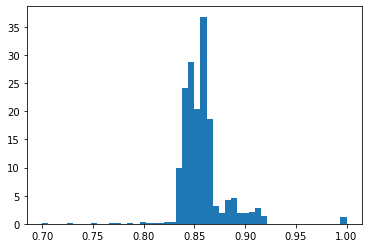

In [8]:
plt.hist(pclearall, bins=50, density = True)

---

### Problem 4 Starter Code

Copy over the code cells for the MCMC example in Inference2, starting with this cell:

In [28]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(123)

Text(0, 0.5, 'N')

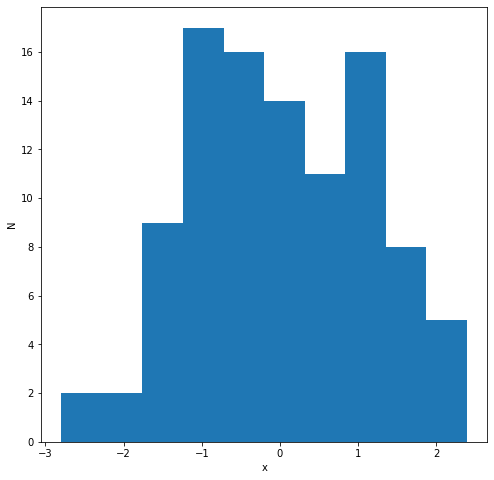

In [29]:
data = np.random.randn(100)
plt.figure(figsize=(8,8))
plt.hist(data)
plt.xlabel('x')
plt.ylabel('N')

Text(0, 0.5, 'post prob')

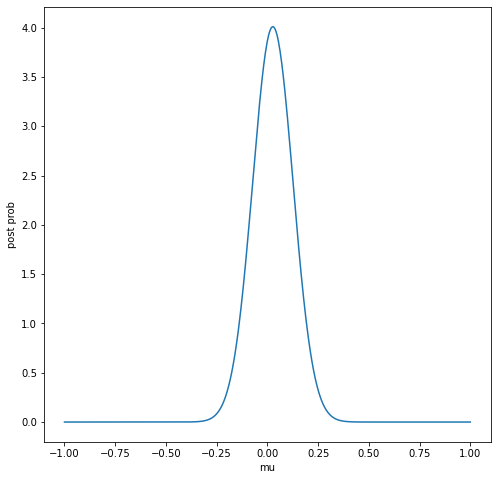

In [30]:
#Execute this cell
def calc_posterior_analytical(data, xgrid, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    #Error-weighted sum of prior and average of data
    #Recall from lecture 3 the formula for the product of 2 Gaussians
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    # This is the Gaussian for the prior: mu_0 / sigma_0**2
    # This is the Gaussian for the likelihood: data.sum() / sigma**2
    # We are deriving the mean from the sum of the data values
    var_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm.pdf(xgrid, mu_post, np.sqrt(var_post))

plt.figure(figsize=(8,8))
xgrid = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, xgrid, 0., 1.)
plt.plot(xgrid, posterior_analytical)
plt.xlabel('mu')
plt.ylabel('post prob')

In [65]:
# Execute this cell
# See https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/MCMC-sampling-for-dummies.ipynb
def sampler(data, samples=4, mu_init=.5, proposal_width=0.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        # changing the width of this distribution changes how big the jump is between trials.
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        global p_accept
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        # Accept if p_accept>1 (since random limited to [0,1]) and if p_accept > rand as well
        global accept
        global rand
        rand=np.random.rand()
        accept = rand < p_accept
        
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    xgrid = np.linspace(-3, 3, 5000)
    #color = 'g' if accepted else 'r'
    if p_accept <1 and p_accept>rand:
        color = 'p'
    elif p_accept>1 and p_accept>rand:
        color = 'g'
    elif not accept:
        color = 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm.pdf(xgrid,mu_prior_mu, mu_prior_sd)
    ax1.plot(xgrid, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm.pdf(xgrid,loc=mu_proposal, scale=1)
    #sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.hist(data,alpha=0.5,density='True')
    ax2.plot(xgrid, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, xgrid, mu_prior_mu, mu_prior_sd)
    ax3.plot(xgrid, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

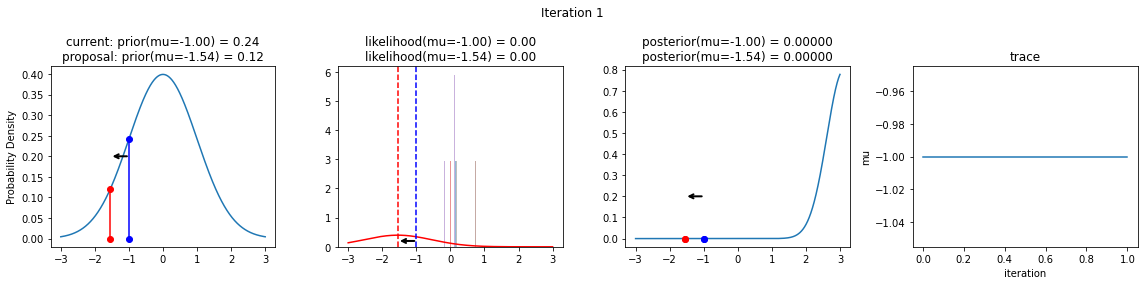

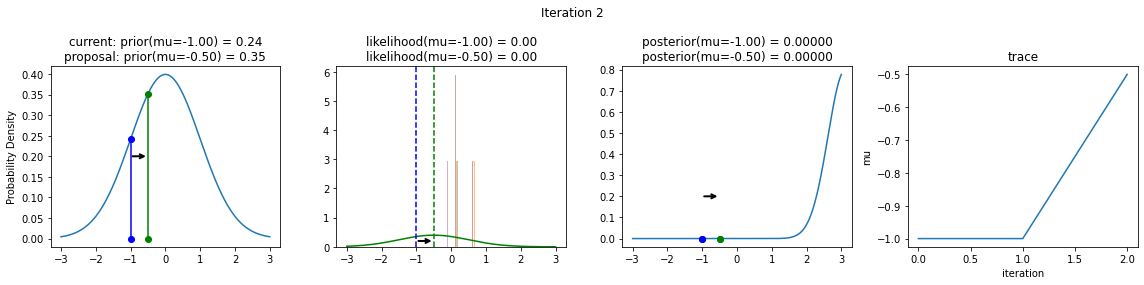

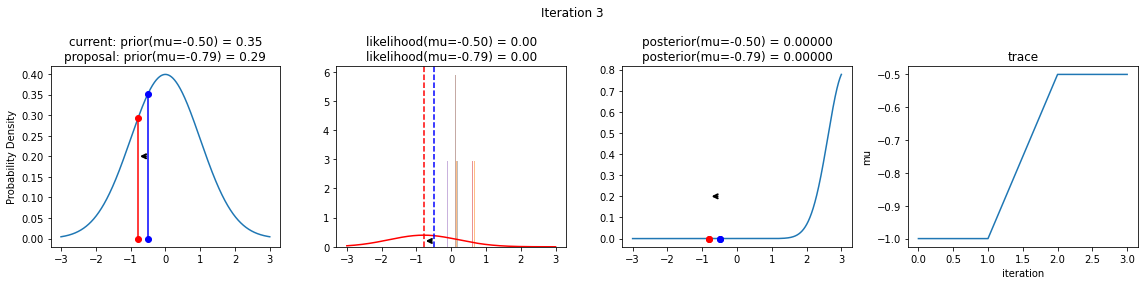

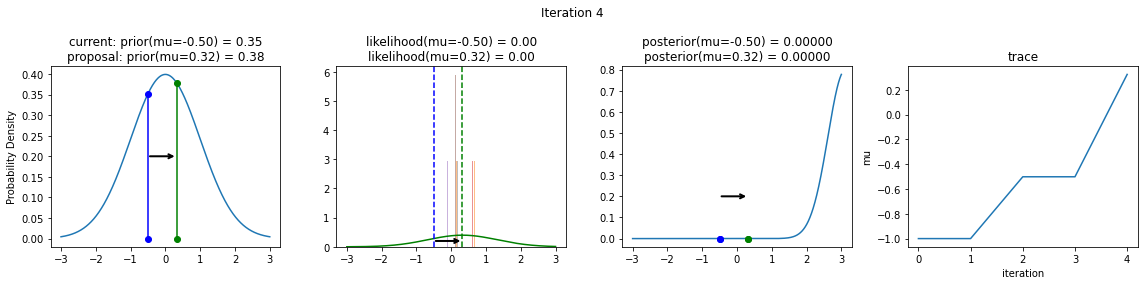

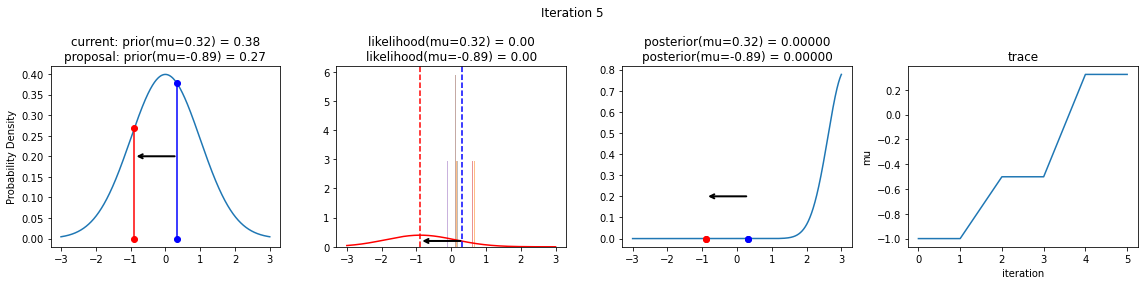

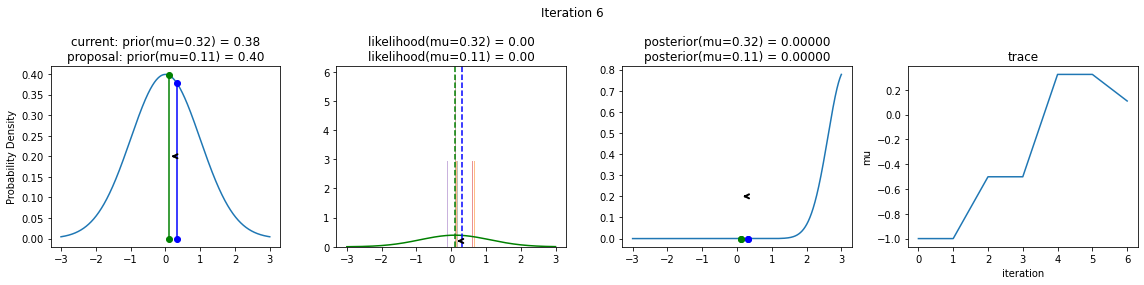

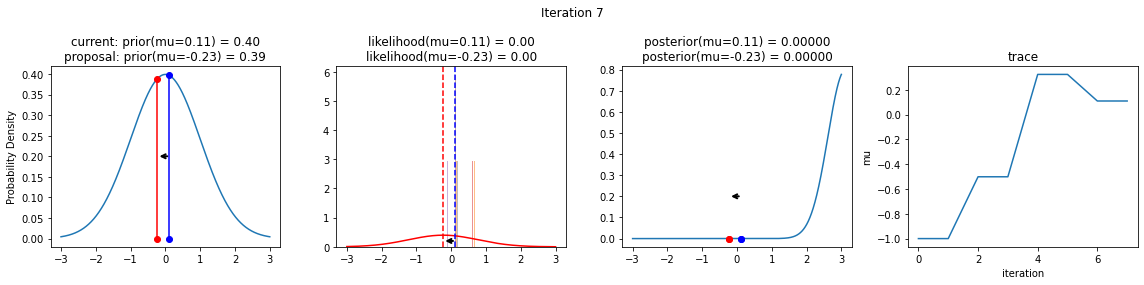

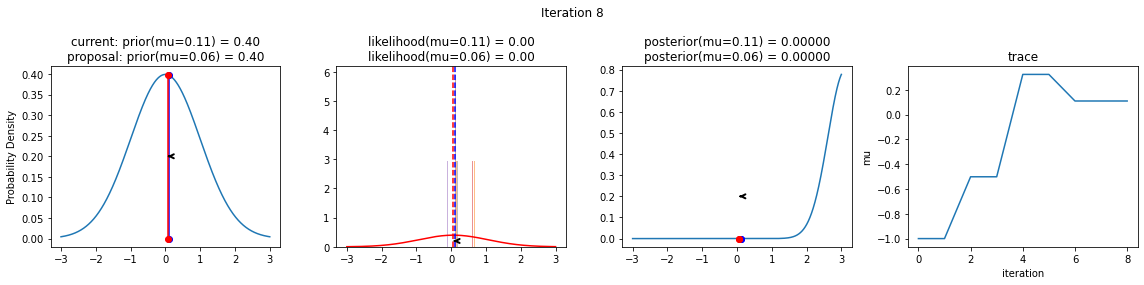

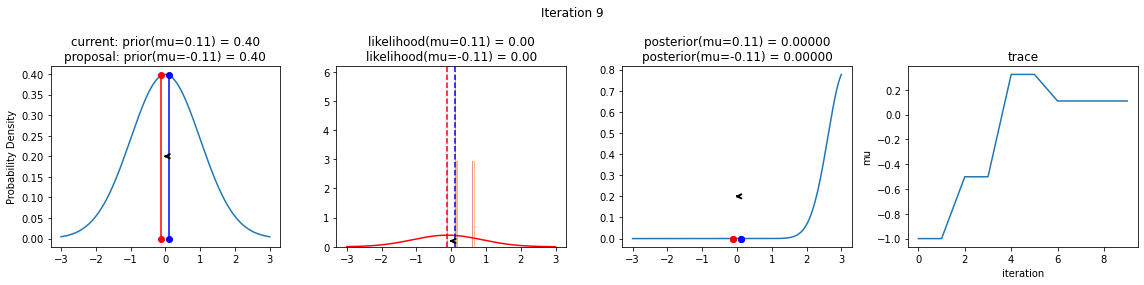

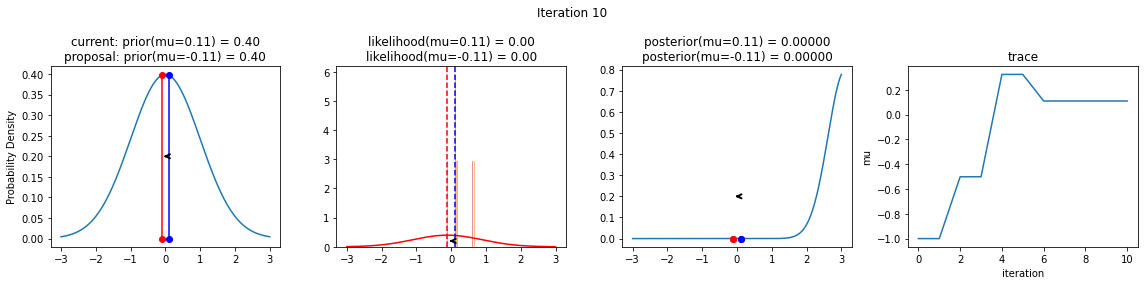

In [66]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

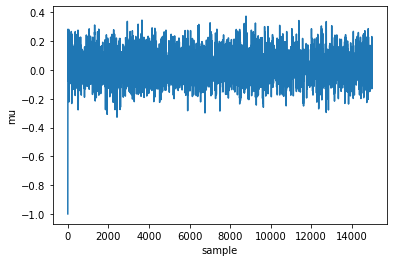

In [33]:
posterior = sampler(data, samples=15000, mu_init=-1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

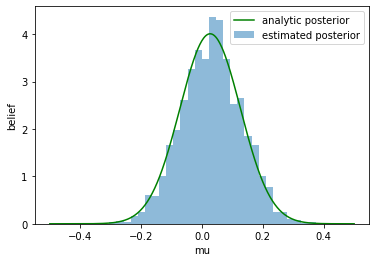

In [40]:
ax = plt.subplot()

burn = 500
ax.hist(posterior[burn:],bins=30,alpha=0.5,density='True',label='estimated posterior')
xplot = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, xplot, 0, 1)
ax.plot(xplot, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend(fontsize=10);

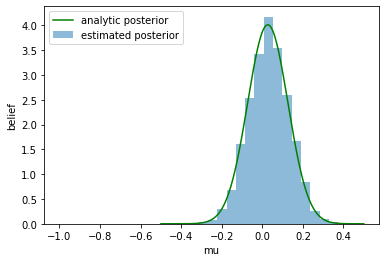

In [39]:
ax = plt.subplot()

burn = 0
ax.hist(posterior[burn:],bins=30,alpha=0.5,density='True',label='estimated posterior')
xplot = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, xplot, 0, 1)
ax.plot(xplot, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend(fontsize=10);

In [ ]:
#plot chain, plot histogram w/ burn and w/out burn

And so on for the rest of the cells in this example.  Change the cells as needed based on the questions posed.